Author: Carlos Roberto de Melo
    
Date: 09/04/2020
    
Obj: Create a mask only in the position of the lens light.

In [1]:
import autofit as af
import autolens as al
import autolens.plot as aplt
import scribbler
import numpy as np

In [2]:
from pyprojroot import here

workspace_path = str(here())
print("Workspace Path: ", workspace_path)

Workspace Path:  /home/carlos/Documents/GitHub/Master-Degree


Create the path where the mask will be output,

In [3]:
dataset_type = "Data"


dataset_path = af.util.create_path(
    path=workspace_path, folders=["Autolens_tests/autolens_workspace/Test_1/", dataset_type]
)

First, load the imaging dataset, so that the mask can be plotted over the strong lens image.

In [4]:
pixel_scales = 0.1

image = al.Array.from_fits(
    file_path=f"{dataset_path}/image.fits", pixel_scales=pixel_scales
)

In [5]:
#Select and drawn the mask
scribbler = scribbler.Scribbler(image=image.in_2d)


In [6]:
mask = scribbler.show_mask()

In [7]:
mask = al.Mask.manual(mask=np.invert(mask), pixel_scales=pixel_scales)

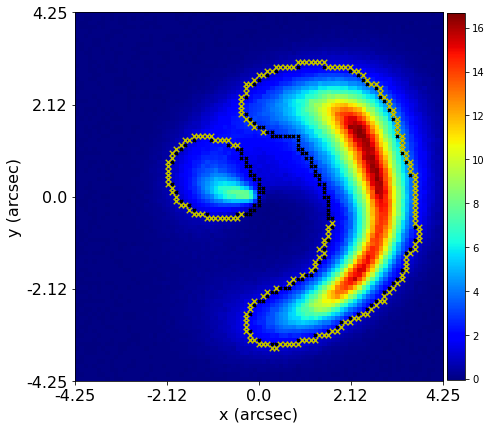

In [8]:
%matplotlib inline
aplt.Array(array=image, mask=mask, include=aplt.Include(border=True))

In [9]:
#Save in fits file
mask.output_to_fits(file_path=f"{dataset_path}/mask.fits", overwrite=True)

Now we load the mask and data to see how it works.

In [10]:
#Reading data

dataset_type = "Autolens_tests/autolens_workspace/Test_1/"
dataset_name = "Data"
dataset_path = f"{workspace_path}/{dataset_type}/{dataset_name}"

imaging = al.Imaging.from_fits(
    image_path=f"{dataset_path}/image.fits",
    noise_map_path=f"{dataset_path}/noise.fits",
    psf_path=f"{dataset_path}/psf.fits",
    pixel_scales=0.1,
)


In [11]:
#Load mask

mask_custom = al.Mask.from_fits(
    file_path=f"{dataset_path}/mask.fits", hdu=0, pixel_scales=pixel_scales
)

masked_imaging = al.MaskedImaging(imaging=imaging, mask=mask_custom)

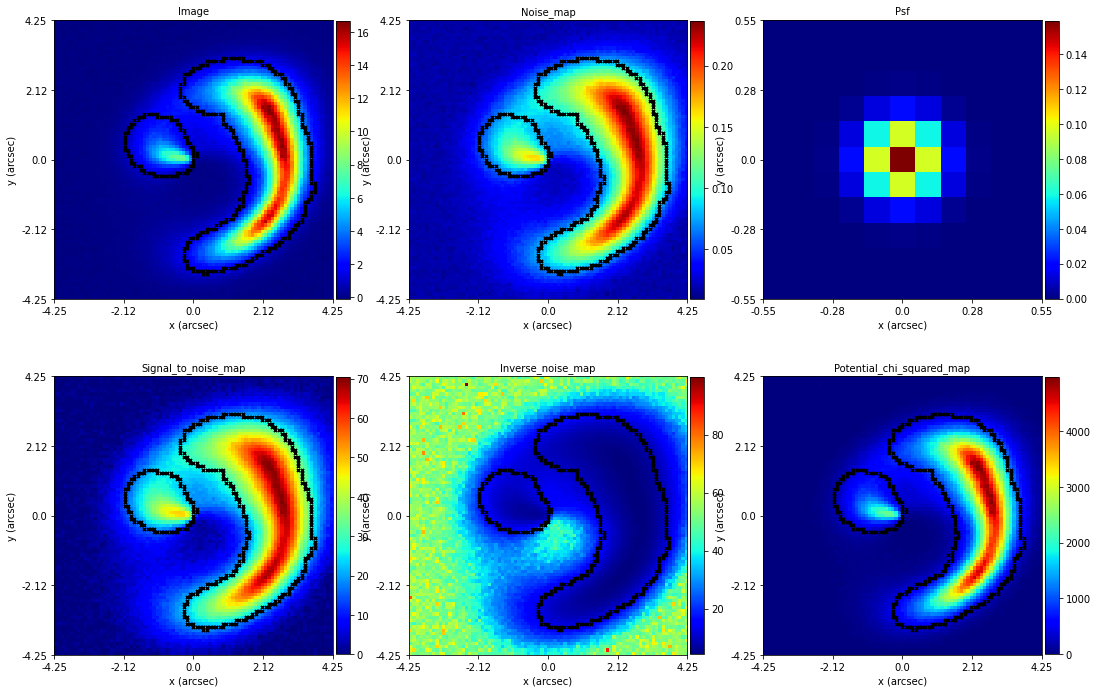

In [12]:
%matplotlib inline
#Plot

aplt.Imaging.subplot_imaging(
    imaging=imaging, mask=mask_custom, include=aplt.Include(border=False),
)

In [13]:
masked_imaging.grid.shape

(2943, 2)